# Homework 4: Natural Language Processing

# Download the data:
We will be using a subset of the data from [Project Gutenberg](http://www.gutenberg.org).

>Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library. Most of the items in its collection are the full texts of public domain books. The project tries to make these as free as possible, in long-lasting, open formats that can be used on almost any computer., Project Gutenberg reached 57,000 items in its collection of free eBooks.

We will use a [cleaned up corpus](https://github.com/aparrish/gutenberg-dammit) that was processed by [Allison Parish](https://www.decontextualize.com/). This processing step was done to standardize metadata and text encoding. The dataset is described on the [project page](https://github.com/aparrish/gutenberg-dammit#gutenberg-dammit). Note that there are plain text files withing subdirectories numbered with the first three digits of the document ID, and there is also a JSON file of document metadata with title, author, and other information.


We created a reduced subset of 4000 documents for the purpose of this assignment that can be downloaded below:

https://drive.google.com/file/d/1V5ep_5veAccCD-YxGlVfv3DsXczBIvv5/view?usp=sharing

This ZIP file is approximately 550 MB compressed, and 1.45 GB uncompressed.

In [4]:
# --Imports--
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter

#--removes linebreaks
import os
# os.linesep

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import gensim

In [5]:
# --Create nlp language model in en--
nlp = spacy.load('en')
nlp

## Q1. (10 pts.) Data cleaning
- (3 pts.) Import the downloaded data
- (2 pts.) Convert to lowercase
- (2 pts.) Remove stopwords 
- (2 pts.) Remove punctuation and any other non-alphabet characters

In [6]:
# --Import downloaded data--
import pandas as pd
import os
import glob

# df_list = []
doc_string = ''
doc_lst1 = []

dirname = 'hw4_2/gutenberg-dammit-files/'

for file in os.listdir(dirname): #this code points to the numbered files within gutenberg (or files inside nlp_test)
#     print(file) # this prints each file name
    for inside_file in glob.glob(dirname + '{}/*.txt'.format(file)): # this gets the name of each .txt file inside the main file
#         print(inside_file) #this prints out the path name
        with open(inside_file) as f: #this reads the text
#             print(f.read())
#             doc_string += f.read() #this adds all of the document contents to doc_string
            temp = f.read()
            doc_string += temp.rstrip()
            doc_lst1.append(temp.rstrip()) #this takes out the '\n'
            
# print('{}'.format(doc_string))

### Clean a list, doc_lst1, where each element of the list is a book from Gutenberg-dammit

In [4]:
#--gives a list where each element is a book---
doc_lst1[0][:100]

'THE BOOK OF MORMON\n\nAn Account Written\n\nBY THE HAND OF MORMON\n\nUPON PLATES\n\nTAKEN FROM THE PLATES OF'

In [5]:
print(len(doc_lst1))

4000


#### Lowercase

In [7]:
#--Create a list where all of the books are lower case---
doc_lst1_lower = []
for book in doc_lst1:
    doc_lst1_lower.append(book.lower())

In [8]:
doc_lst1_lower[0][:200]

'the book of mormon\n\nan account written\n\nby the hand of mormon\n\nupon plates\n\ntaken from the plates of nephi\n\n\nwherefore, it is an abridgment of the record of the people of\nnephi, and also of the lamani'

#### Remove punctuation

In [9]:
doc_lst1_nopunct = []
for book in doc_lst1_lower:
    doc_lst1_nopunct.append(re.sub(r'[^\w\s]', ' ', book))

In [10]:
doc_lst1_nopunct[0][:200]

'the book of mormon\n\nan account written\n\nby the hand of mormon\n\nupon plates\n\ntaken from the plates of nephi\n\n\nwherefore  it is an abridgment of the record of the people of\nnephi  and also of the lamani'

#### Remove '\n'

In [11]:
doc_lst1_nonewline = []
for book in doc_lst1_nopunct:
    doc_lst1_nonewline.append(book.replace(os.linesep, " "))

In [12]:
doc_lst1_nonewline[0][:100]

'the book of mormon  an account written  by the hand of mormon  upon plates  taken from the plates of'

#### Remove all numerical numbers [0-9] -- this list is cleaned except for stopwords

In [13]:
doc_lst1_nonum = []
for book in doc_lst1_nonewline:
    doc_lst1_nonum.append(re.sub(r'[0-9]+', '', book))

In [26]:
##--chose to use a doc that has numbers in the beginning to show that numbers are no longer in the doc
doc_lst1_nonum[0][:200]

'the book of mormon  an account written  by the hand of mormon  upon plates  taken from the plates of nephi   wherefore  it is an abridgment of the record of the people of nephi  and also of the lamani'

#### Remove stopwords

###### Split each book into a list of words

In [15]:
words = []
for word in doc_lst1_nonum:
    words.append(word.split())

In [16]:
words[0][:9]

['the', 'book', 'of', 'mormon', 'an', 'account', 'written', 'by', 'the']

In [18]:
len(words)

4000

###### Remove stopwords from each list of words (or each document)

In [19]:
doc_lst1_noStopWs = []
for doc in words:
    doc_lst1_noStopWs.append([w for w in doc if not w in STOP_WORDS])

In [20]:
doc_lst1_noStopWs[0][:8]

['book', 'mormon', 'account', 'written', 'hand', 'mormon', 'plates', 'taken']

In [21]:
clean_doc1_lst1 = doc_lst1_noStopWs

In [24]:
clean_doc1_lst1[1][:5]

['world', 'factbook', 'afghanistan', 'geography', 'total']

### Clean a string, doc_string, of the full text (all of the books combined)

In [67]:
#--gives a string of all of the documents combined--
print(doc_string[:18])

THE BOOK OF MORMON


In [9]:
print(len(doc_string))

1426022240


In [26]:
# --Convert string to lowercase--
sent_low = doc_string.lower()

In [27]:
sent_low[:100]

'the book of mormon\n\nan account written\n\nby the hand of mormon\n\nupon plates\n\ntaken from the plates of'

In [28]:
#--Remove punctuation from the string--
sent_low_pnct2 = re.sub(r'[^\w\s]', ' ', sent_low)

In [63]:
sent_low_pnct2[:100]

'the book of mormon\n\nan account written\n\nby the hand of mormon\n\nupon plates\n\ntaken from the plates of nephi\n\n\nwherefore  it is an abridgment of the record of the people of\nnephi  and also of the lamani'

In [57]:
#--Remove '\n'--
sent_low_pnct3 = sent_low_pnct2.replace(os.linesep, " ")

In [62]:
sent_low_pnct3[:200]

'the book of mormon  an account written  by the hand of mormon  upon plates  taken from the plates of nephi   wherefore  it is an abridgment of the record of the people of nephi  and also of the lamani'

In [17]:
#--Remove numbers from entire dataset--
sent_low_nonum = re.sub(r'[0-9]+', '', sent_low_pnct3)

In [68]:
print(len(sent_low_nonum))

4000


In [24]:
#--Remove stopwords from entire dataset--
words = sent_low_nonum.split()
words_nostop = [word for word in words if not word in STOP_WORDS]

In [34]:
words_nostop[:8]

['book', 'mormon', 'account', 'written', 'hand', 'mormon', 'plates', 'taken']

## Q2. (10 pts.) Frequency of Part of Speech (POS) tags
- Use spaCy
  - Use the original (or uncleaned) documents. spaCy does POS tagging better when the sentence is more complete. 
- (4 pts.) Extract POS tags from the first 100 sentences of selected 5 books. 
- (4 pts.) Plot the frequency of POS tags
- (2 pts.) Provide your interpretation

In [27]:
#--Put documents into a list--

# df_list = []
# doc_string = ''
doc_lst = []

dirname = 'hw4_2/gutenberg-dammit-files/'

for file in os.listdir(dirname): #this code points to the numbered files within gutenberg (or files inside nlp_test)
#     print(file) # this prints each file name
    for inside_file in glob.glob(dirname + '{}/*.txt'.format(file)): # this gets the name of each .txt file inside the main file
#         print(inside_file) #this prints out the path name
        with open(inside_file) as f: #this reads the text
#             print(f.read())
#             doc_string += f.read() #this adds all of the document contents to doc_string
            temp = f.read()
#             doc_string += temp.rstrip()
            doc_lst.append(temp.rstrip()) 

In [28]:
#--Confirm the number of documents in doc_lst--
len(doc_lst)

4000

In [29]:
#--Get 5 books and remove titles, authors, etc.--
book1 = doc_lst[7] #--What Happened at Miss Minchin's by FRANCES HODGSON BURNETT 001/000137.txt
#remove titles to get first 100 sentences, do this for each book:
book1 = book1[79:]
book_lst1 = []

book2 = doc_lst[8] #--The Island of Doctor Moreau by H.G. Wells 001/00159.txt
book2 = book2[765:]
book_lst2 = []

book3 = doc_lst[9] #--The Picture of Dorian Gray by Oscar Wilde 001/00174.txt
book3 = book3[86:]
book_lst3 = []

book4 = doc_lst[3] #--The Gods of Mars by Edgar Rice Burroughs 000/00064.txt
book4 = book4[143:]
book_lst4 = []

book5 = doc_lst[5] #--Tom Sawyer Abroad by Mark Twain 000/00091.txt
book5 = book5[74:]
book_lst5 = []

In [30]:
#--Get first 100 sentences for each book--

#--1. Function to split each book on the sentence
def sentence_lsts(book, num_lst):
    doc = nlp(book)
    for i, sent in enumerate(doc.sents):
        num_lst.append(sent)


In [31]:
#--1a. Run each book through sentence_lsts function
sentence_lsts(book1, book_lst1)
sentence_lsts(book2, book_lst2)
sentence_lsts(book3, book_lst3)
sentence_lsts(book4, book_lst4)
sentence_lsts(book5, book_lst5)

In [32]:
#--1b. Create variables of 100 sentences for each book--
first100_book1 = book_lst1[:100]
first100_book2 = book_lst2[:100]
first100_book3 = book_lst3[:100]
first100_book4 = book_lst4[:100]
first100_book5 = book_lst5[:100]

In [33]:
#--1c. Convert 100 sentences to a string for doc=nlp(book)
# print(type(first100_book1))
strlst_book_1 = []
for sent in first100_book1:
    strlst_book_1.append(str(sent))
    
book1_100sent_str = " ".join(strlst_book_1)
# for elem in strlst_book_1:
#     print(type(elem))


#--Book 2--
strlst_book_2 = []
for sent in first100_book2:
    strlst_book_2.append(str(sent))
    
book2_100sent_str = " ".join(strlst_book_2)

#--Book3--
strlst_book_3 = []
for sent in first100_book3:
    strlst_book_3.append(str(sent))
    
book3_100sent_str = " ".join(strlst_book_3)

#--Book 4--
strlst_book_4 = []
for sent in first100_book4:
    strlst_book_4.append(str(sent))
    
book4_100sent_str = " ".join(strlst_book_4)

#--Book 5--
strlst_book_5 = []
for sent in first100_book5:
    strlst_book_5.append(str(sent))
    
book5_100sent_str = " ".join(strlst_book_5)

In [199]:
#--3. POS Tagging for each book--
def getPOStags(book, lst):
#     print('POS for first 100 sentences')
    lst = []
    doc = nlp(book)
#     print('created doc')
#     for i, sent in enumerate(doc.sents):
    for i, sent in enumerate(doc.sents):
#         print('inside enumerate')
#         print("__sentence__:", i)
#         print("_token_ \t _POS_")
        for token in sent:
            lst.append((token.text, token.pos_))
#             print(token.text, "\t", token.pos_)
    return lst

In [203]:
#--Create empty lists to feed into getPOStags
lst1 = []
lst2 = []
lst3 = []
lst4 = []
lst5 = []

#--Create list of tuples that include POS tags for each book
book1_POStags = getPOStags(book1_100sent_str, lst1)
book2_POStags = getPOStags(book2_100sent_str, lst2)
book3_POStags = getPOStags(book3_100sent_str, lst3)
book4_POStags = getPOStags(book4_100sent_str, lst4)
book5_POStags = getPOStags(book5_100sent_str, lst5)

In [207]:
#--Create list with total number of POS tags for each book--
pos_lst1 = []
for tag in book1_POStags:
    pos_lst1.append(tag[1])

pos_lst2 = []
for tag in book2_POStags:
    pos_lst2.append(tag[1])

pos_lst3 = []
for tag in book3_POStags:
    pos_lst3.append(tag[1])

pos_lst4 = []
for tag in book4_POStags:
    pos_lst4.append(tag[1])

pos_lst5 = []
for tag in book5_POStags:
    pos_lst5.append(tag[1])

In [217]:
#--Create frequency distribution for POS tags--
posFreq_book1 = dict(Counter(pos_lst1))
posFreq_book2 = dict(Counter(pos_lst2))
posFreq_book3 = dict(Counter(pos_lst3))
posFreq_book4 = dict(Counter(pos_lst4))
posFreq_book5 = dict(Counter(pos_lst5))

In [218]:
#--Sort dictionaries by values for each book--
posFreq_book1 = sorted(posFreq_book1.items(), key=lambda x: x[1])
posFreq_book2 = sorted(posFreq_book2.items(), key=lambda x: x[1])
posFreq_book3 = sorted(posFreq_book3.items(), key=lambda x: x[1])
posFreq_book4 = sorted(posFreq_book4.items(), key=lambda x: x[1])
posFreq_book5 = sorted(posFreq_book5.items(), key=lambda x: x[1])

### POS frequency distribution plots for each book

In [251]:
#-- Lists for book titles --
title1 = "POS tag frequencies for What Happened at Miss Minchin's by Frances Hidgsib Burnett"
title2 = "POS tag frequencies for The Island of Doctor Moreau by H.G. Wells"
title3 = "POS tags frequencies for The Picture of Dorian Gray by Oscar Wilde"
title4 = "POS tags frequencies for The Gods of Mars by Edgar Rice Burroughs"
title5 = "POS frequencies tags for Tom Sawyer Abroad by Mark Twain"

In [252]:
#-- Function to make POS frequency plots --
def freq_plot(lst, title):
    plt.figure(figsize=(45,10))
    sns.countplot(lst, order=pd.Series(lst).value_counts()
                  .index).set_title(title)
    plt.xticks(rotation=90)
    plt.show()

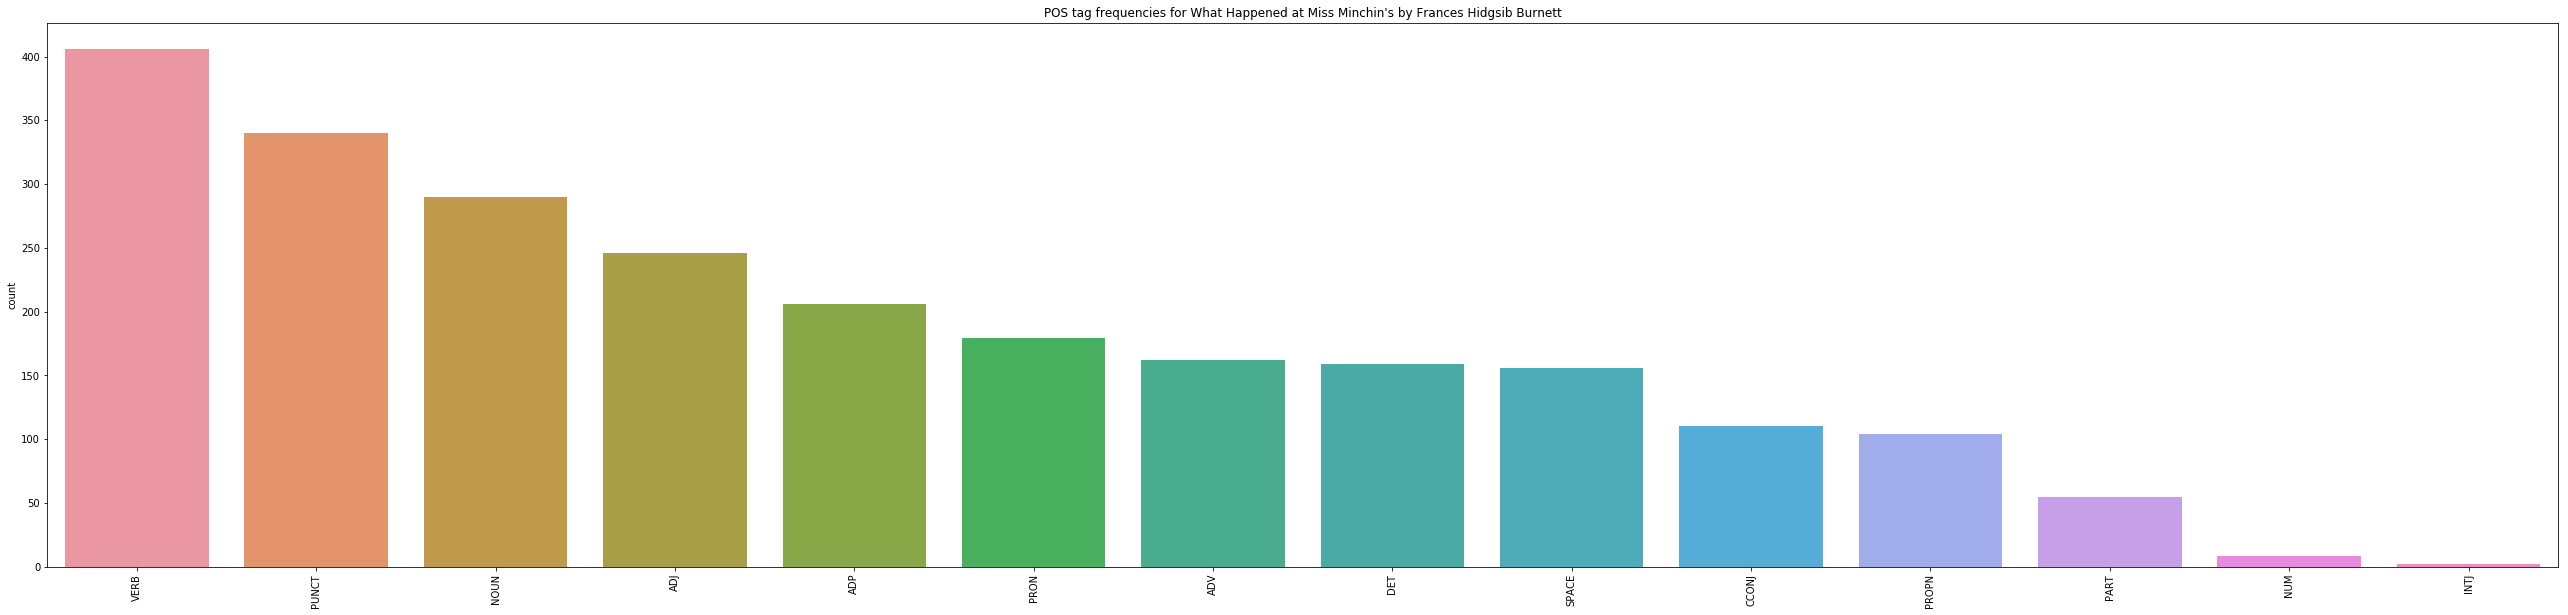

In [253]:
#--Book 1 POS Frequency Plot--
freq_plot(pos_lst1, title1)

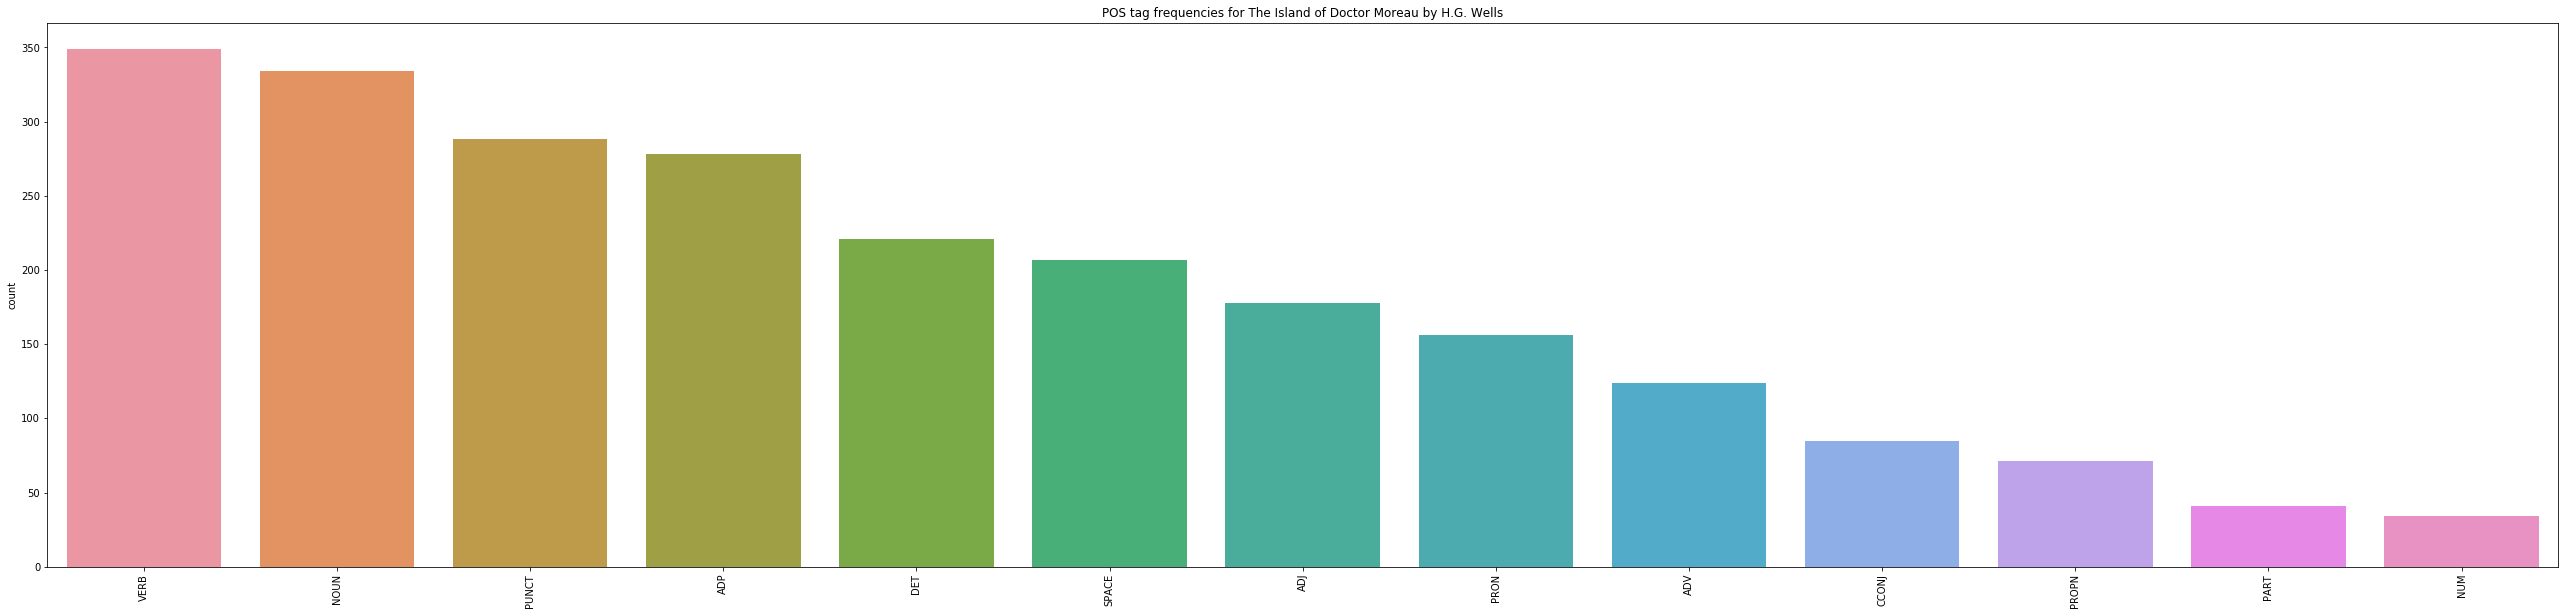

In [254]:
#--Book 2 POS Frequency Plot--
freq_plot(pos_lst2, title2)

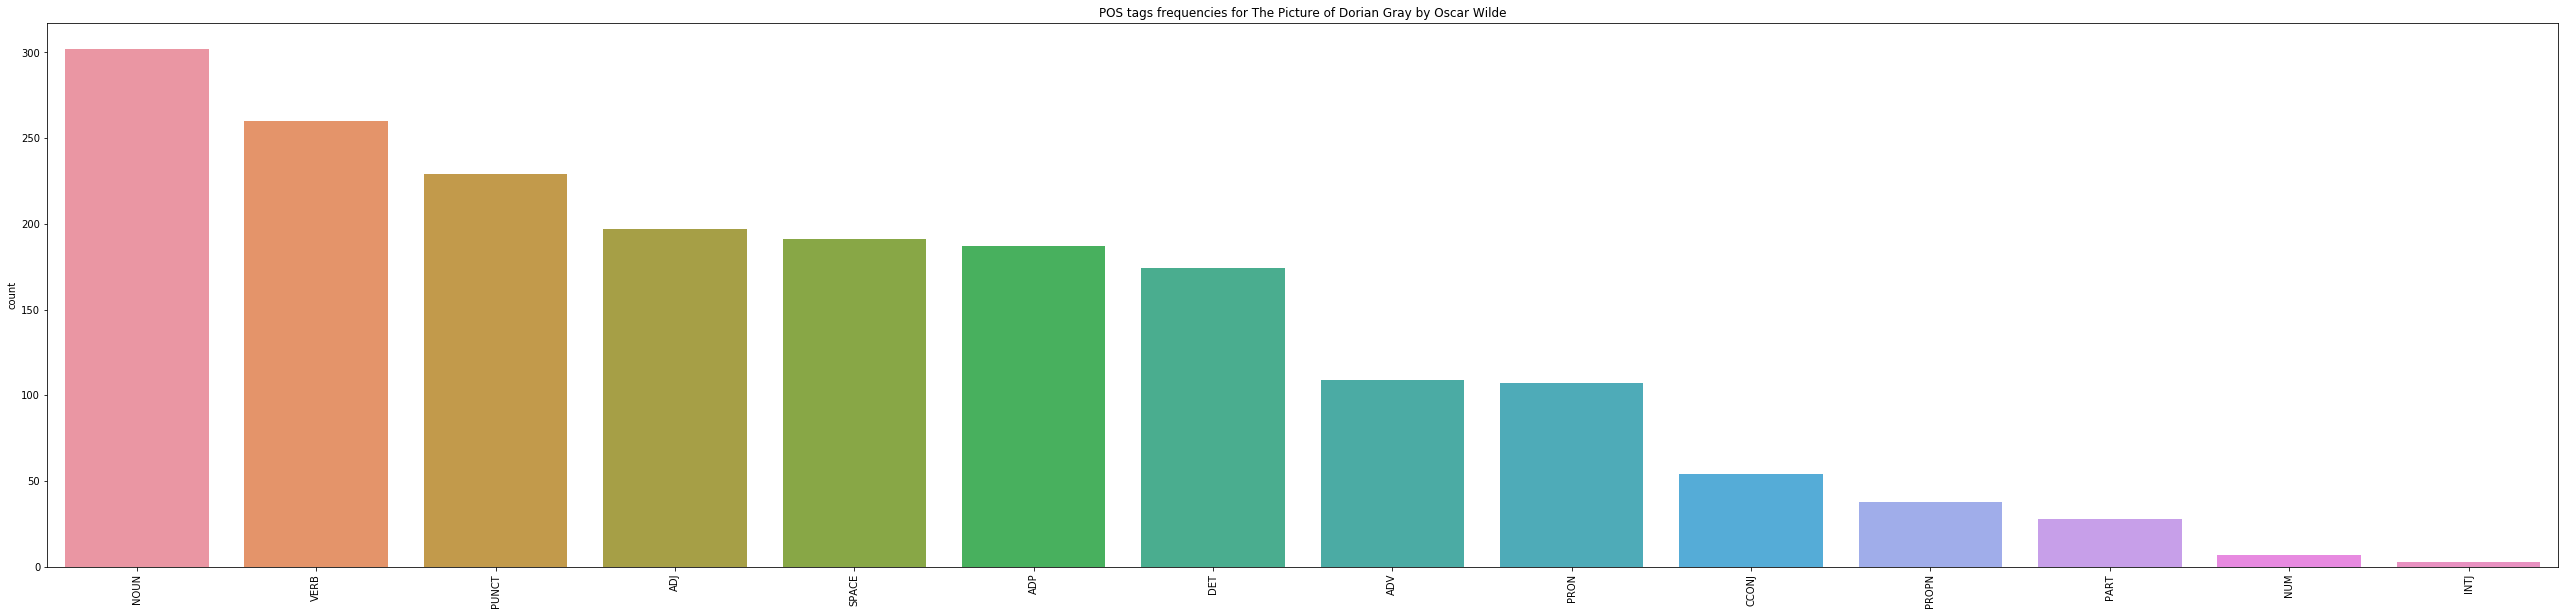

In [255]:
#--Book 3 POS Frequency Plot--
freq_plot(pos_lst3, title3)

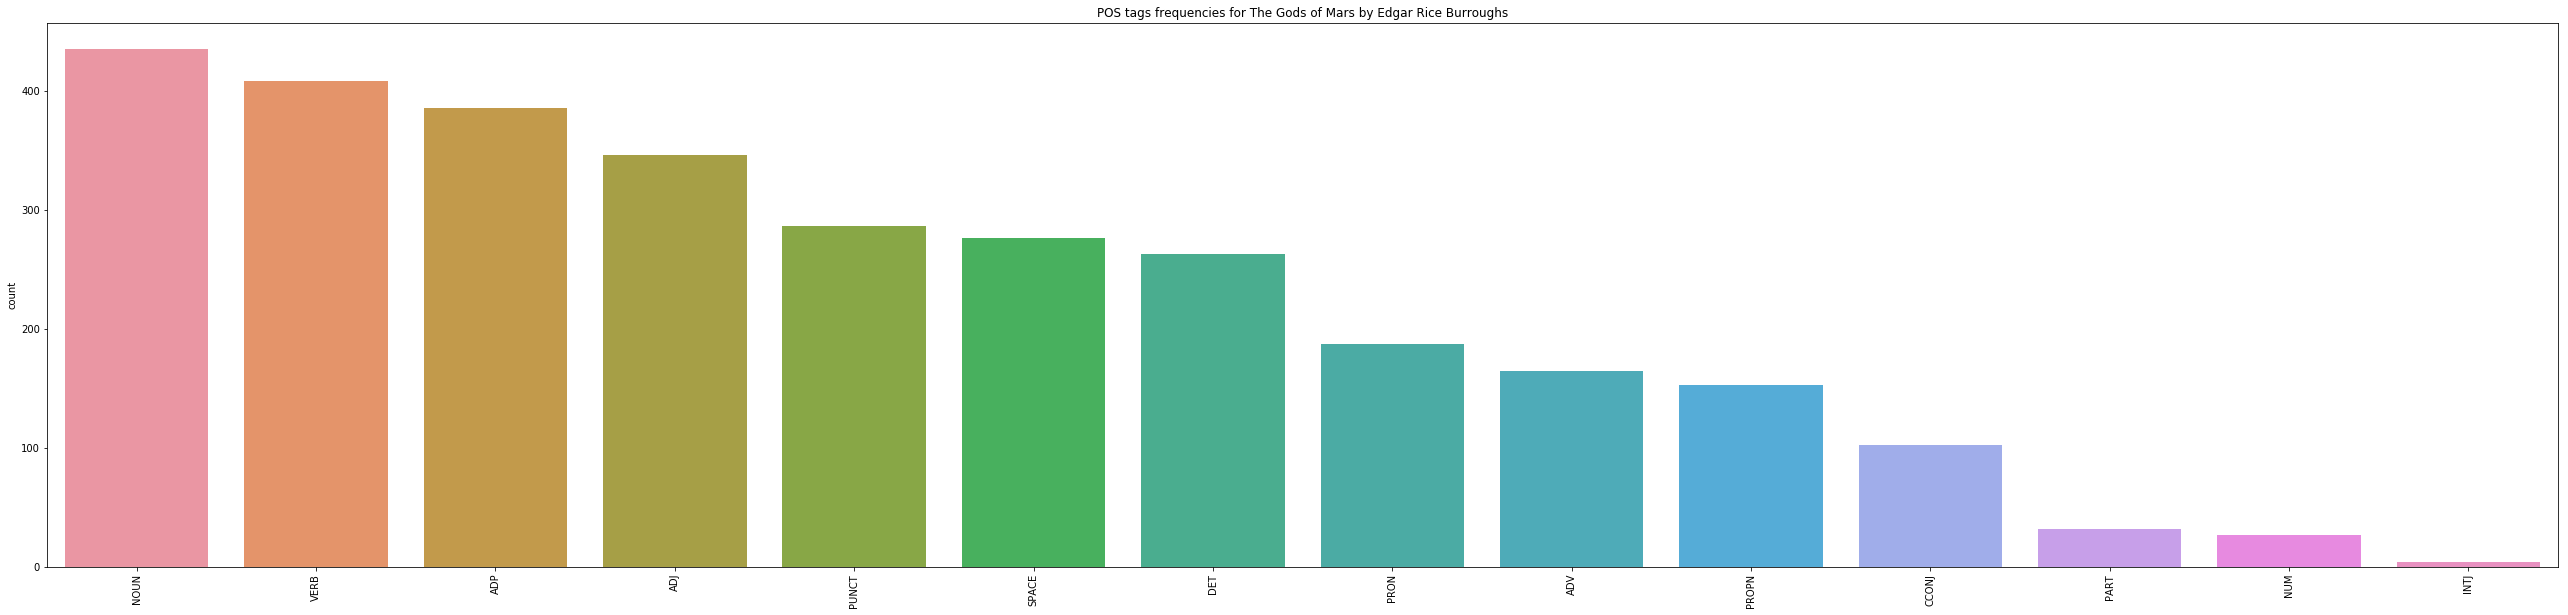

In [256]:
#--Book 4 POS Frequency Plot--
freq_plot(pos_lst4, title4)

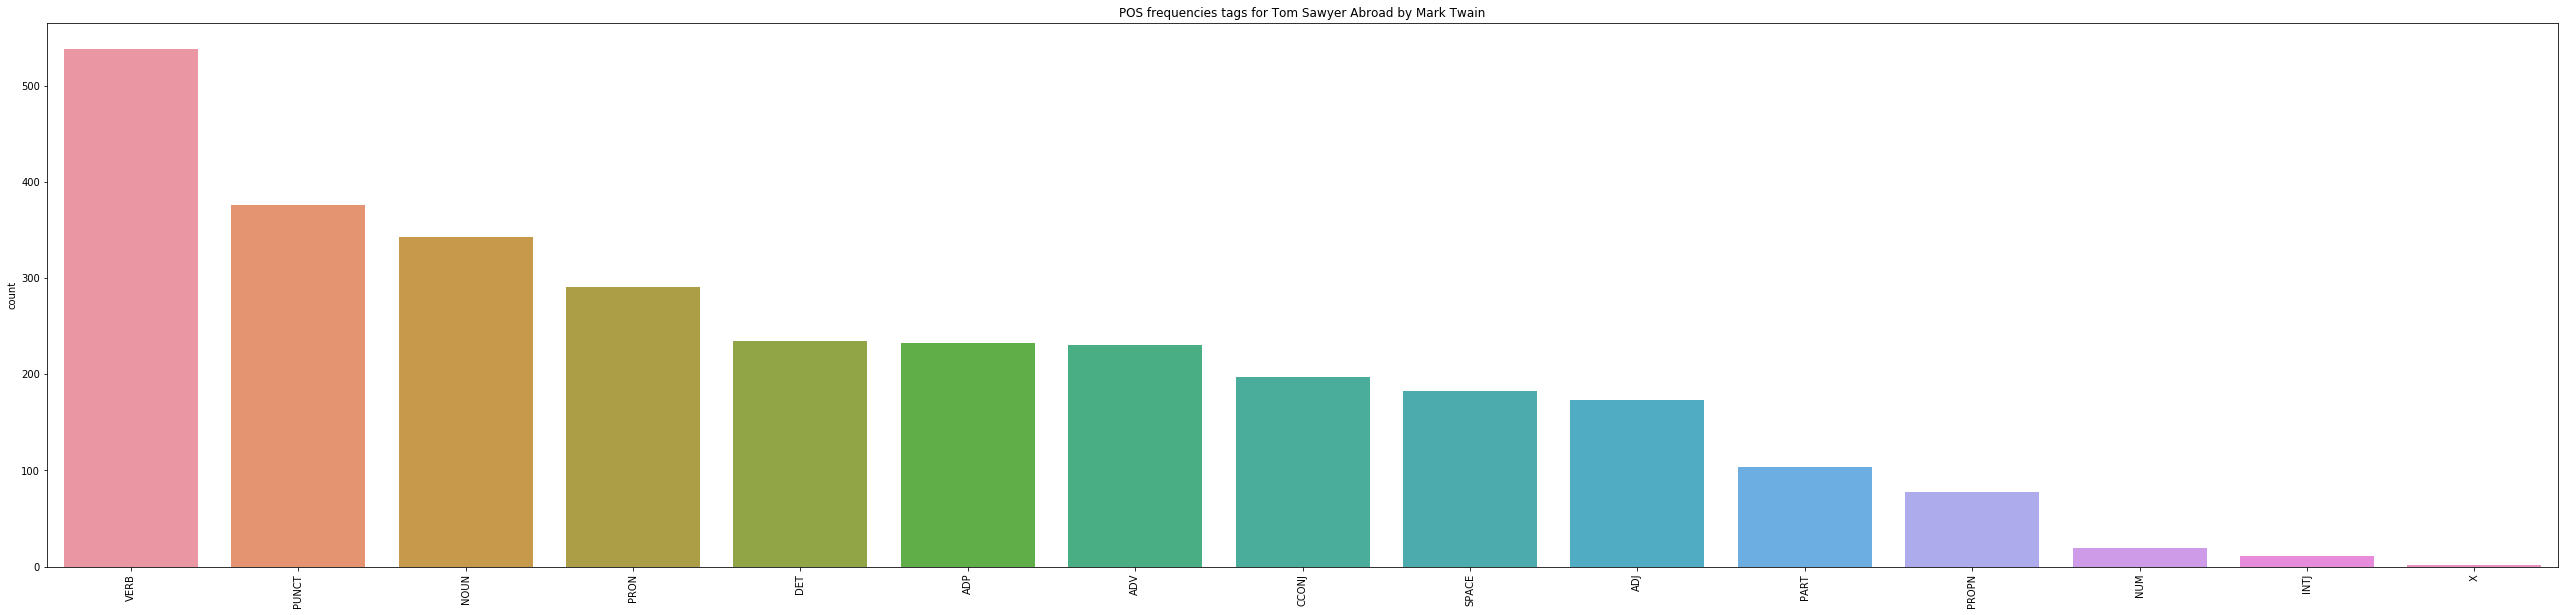

In [257]:
#--Book 5 POS Frequency Plot--
freq_plot(pos_lst5, title5)

### Interpretation for Q2.

For this exercise, I first removed the title, author, and table of contents for each of the books to get a better idea of the actual sentences within the book. Once I split the sentences, I found the frequencies for the part of speech for each book and plotted them using Seaborn. 

For these plots, it seems the the POS that is most common in the books that I chose are either Verb or Noun, with occurrences between 300 and 500. Punctuation is also pretty high and typically appears between 225 and 375 times. The least common POS for these books is typically either a number(NUM) or an interjection(INTJ). 

## Q3. (10 pts.) Make wordclouds for 5 books
- Use the [```word_cloud```](https://github.com/amueller/word_cloud) package.
- (8 pts.) Create a wordcloud for 5 books that you choose.
  - The author of each book should be different.
- (2pts.) Provide your interpretation.

In [287]:
#--Create word lists for each book--
book1a = doc_lst[101] # Book1a = The Story of Little Black Sambo and the Story of Little Black Mingo by Helen Bannerman
# tokens_book1a = nltk.word_tokenize(book1a)
# words=[word.lower() for word in words if word.isalpha()]
book2a = doc_lst[201] #Book2a = The Crusade of the Excelsior by Bret Harte
book3a = doc_lst[301] #Book3a = Maurice Guest by Henry Handel
book4a = doc_lst[401] #Book4a = The Cossacks A Tale of 1852 by Leo Tolstoy
book5a = doc_lst[501] #Book5a = Love Mary by Alice Hegan Rice

In [290]:
#--Function to create word clouds--
def create_wordcloud(book):
    # Create and generate a word cloud image for each book:
    wordcloud = WordCloud().generate(book)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

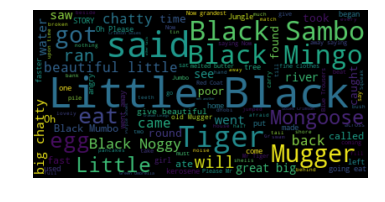

In [291]:
#--WordCloud for Book1a-- The Story of Little Black Sambo and the Story of Little Black Mingo by Helen Bannerman
create_wordcloud(book1a)

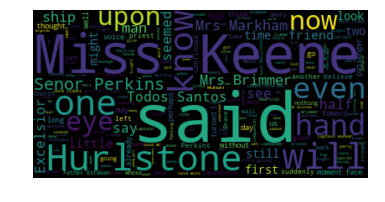

In [292]:
#--WordCloud for Book2a-- The Crusade of the Excelsior by Bret Harte
create_wordcloud(book2a)

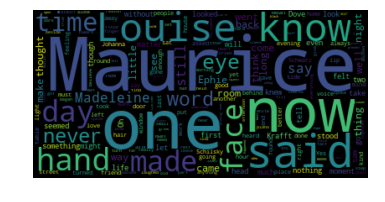

In [295]:
#--WordCloud for Book3a-- Maurice Guest by Henry Handel
create_wordcloud(book3a)

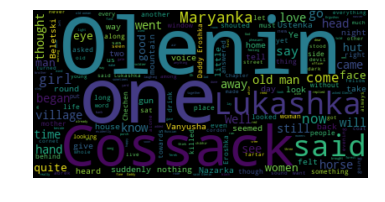

In [296]:
#--WordCloud for Book4a-- The Cossacks A Tale of 1852 by Leo Tolstoy
create_wordcloud(book4a)

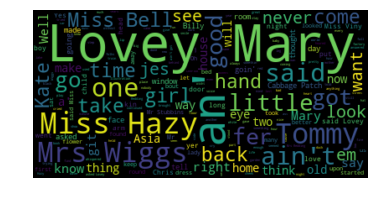

In [297]:
#--WordCloud for Book5a-- Love Mary by Alice Hegan Rice
create_wordcloud(book5a)

### Interpretation for Q3

For this exercise, I chose to look at 5 books different from question 2. After generating a word cloud for each book, I noticed that one of the most common words for each of the books was a word, or a few words that also appeared in their respective titles. Although I am not familiar with many of the books chosen, it seems that you can get a good idea of the characters that appear more often, for example in Book5a, we see Mary, Tommy, Miss Hazy, and Miss Wiggs as being words that appear with greater frequency in the text. This leads me to believe that these are main characters of the book. However, since the name Mary is larger than the other names, it seems that Mary must be the most prominent character, or character that appears the most in the book. 

Looking at all of the word clouds for the five books, it seems that each of them show a few prominent characters, as well as a few characters that may also appear frequently. 

## Q4. (bonus 5 pts.) Train your own word2vec vector.
- Use the ```gensim``` package
  - Your input will be the output from Q1 (cleaned data)
- Hint: You can look into this tutorial for training the new Word2Vec model: https://rare-technologies.com/word2vec-tutorial/
- Use default parameters when you train the Word2Vec model (e.g., ```min_count```, ```size```, etc.), except the number of workers (```workers=?```) parameter.
- Use this model for the later questions. 
  - **If you do not have your Word2Vec model, please use the pre-trained model that we used for the lab to answer the later questions**

In [25]:
from itertools import chain

In [1]:
# Throw in a list of cleaned sentences

doc_lst1_combSent = list(chain(*XXXXXXXX))

In [38]:
len(clean_doc1_lst1)

4000

In [37]:
len(doc_lst1_combSent)

130591965

In [ ]:
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format(doc_lst1_combSent, binary=True)

## Q5. (10 pts.) Similarity from Word2Vec 
- Choose 5 words
- (5pts.) What are the top-10 similar words of each?
- (5pts.) Do you find anything odd or interesting? Please explanation. 
  - (if you have your own word2vec model)How the results are different from the pre-trained model that we used in the lab?

In [254]:
#--Trained Word2Vec model from the lab--
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin", binary=True)

In [255]:
w2v_mod

In [39]:
#-- 5 words --
word1 = 'country'
word2 = 'home'
word3 = 'eat'
word4 = 'sleep'
word5 = 'airplane'

In [41]:
w2v_mod.most_similar(word1)

[('nation', 0.7242872714996338),
 ('continent', 0.6130886077880859),
 ('region', 0.6015146970748901),
 ('world', 0.5980385541915894),
 ('globe', 0.5137461423873901),
 ('America', 0.48584625124931335),
 ('countries', 0.48209190368652344),
 ('national', 0.4780648350715637),
 ('abroad', 0.4719730019569397),
 ('republic', 0.45316553115844727)]

In [44]:
#-- Top 10 similar words for each --
def most_similar10(word):
   return w2v_mod.most_similar(word)

In [45]:
#--10 most similar words to country--
most_similar10(word1)

[('nation', 0.7242872714996338),
 ('continent', 0.6130886077880859),
 ('region', 0.6015146970748901),
 ('world', 0.5980385541915894),
 ('globe', 0.5137461423873901),
 ('America', 0.48584625124931335),
 ('countries', 0.48209190368652344),
 ('national', 0.4780648350715637),
 ('abroad', 0.4719730019569397),
 ('republic', 0.45316553115844727)]

In [46]:
#--10 most similar words to home--
most_similar10(word2)

[('house', 0.5617803335189819),
 ('homes', 0.5108882188796997),
 ('Home', 0.4817159175872803),
 ('residence', 0.4699971079826355),
 ('bedroom', 0.46987205743789673),
 ('apartment', 0.45603448152542114),
 ('bungalow', 0.4279787540435791),
 ('family', 0.426212877035141),
 ('townhouse', 0.41363024711608887),
 ('hom', 0.4032522141933441)]

In [47]:
#--10 most similar words to eat--
most_similar10(word3)

[('eating', 0.7529404163360596),
 ('ate', 0.7013993859291077),
 ('eaten', 0.6724975109100342),
 ('eats', 0.6589087247848511),
 ('munch', 0.6417747735977173),
 ('consume', 0.6184971332550049),
 ('overeaten', 0.6109130382537842),
 ('overeat', 0.6019770503044128),
 ('Eat', 0.5889648795127869),
 ('nutritiously', 0.5787445902824402)]

In [48]:
#--10 most similar words to sleep--
most_similar10(word4)

[('sleeping', 0.7133433818817139),
 ('slept', 0.6223229169845581),
 ('nap', 0.6182225942611694),
 ('naps', 0.5923708081245422),
 ('Sleep', 0.5842173099517822),
 ('doze', 0.5826046466827393),
 ('snore', 0.5810381174087524),
 ('snooze', 0.5788188576698303),
 ('bed', 0.5776864290237427),
 ('unrefreshed', 0.5719650983810425)]

In [49]:
#--10 most similar words to airplane--
most_similar10(word5)

[('plane', 0.8348400592803955),
 ('airplanes', 0.7777001857757568),
 ('aircraft', 0.76496422290802),
 ('planes', 0.7335888147354126),
 ('jet', 0.7161610126495361),
 ('airliner', 0.7074955105781555),
 ('jetliner', 0.7066360712051392),
 ('Cessna', 0.6621297597885132),
 ('flight', 0.6286509037017822),
 ('jets', 0.6189286112785339)]

### Interpretations for Q5

**Do you find anything odd or interesting? Please explain:**
For this exercise, when looking at the 10 most similar words from the Word2Vec model from the lab, I found that each of the times I ran the most_similar function, I would find a variation of the actual word within the results. For example, for the word 'airplane', I found 'airplanes', which is the plural form of the initial word. The same thing happened with the word 'eat'. However, with the word 'eat', I found the plural format, the capitalized format, and the past and present tenses: eats, Eat, eaten, eating.

It doesn't seem that this model would be extremely helpful as the results are possibly too similar to the initial word. Possibly lemmitizing would be helpful for future models?

## Q6. (15 pts.) Similarity between chapters 
- (5 pts.) Pick 5 chapters from the dataset and describe.
  - Each "chapter" consists of 10 consecutive paragraphs from a single book.
  - The author of each chapter should be different.
  - If necessary, explain how you defined "paragraph". 
- (5 pts.) Calculate the average of vectors for the words included in a chapter.  
  - In this way, you can have a vector that can roughly summarize the contents.    
  - The average vector should have the same dimensionality with word vectors 
    - e.g., if the word vector is a 100 dimension, the average vector for paragraph should be a 100 dimension as well
  - Words should come from the results of Q1 (cleaned out data) (i.e. should not contain stopwords or other special characters).
- (5 pts.) Calculate the similarity between chapters.  
  - Provide your interpretation. 
  - Why do you think some chapters are similar/dissimilar to others?

#### Choose a chapter from 5 different books - each chapter will have 10 consecutive paragraphs

In [244]:
#--Create Book Chapters w/ 10 consecutive paragraphs each--

#--Book 1 Chapter: The Picture of Dorian Gray by Oscar Wilde--
book1ch1 = book3[2151:]
book1_10pars = book1ch1[:3535]

#--Book 2 Chapter: The Wrongs of Woman by Maria--
book2_ch1 = doc_lst[6]
book2ch1 = book2_ch1[5273:]
book2_10pars = book2ch1[:5555]

#--Book 3 Chapter: The Cost by David Graham Phillips--
book3_ch1 = doc_lst[33]
book3_ch1 = book3_ch1[890:]
book3_10pars = book3_ch1[:6805]

# #--Book 4 Chapter: The Aeneid by Virgil
book4_ch1 = doc_lst[11]
book4_ch1 = book4_ch1[47:]
book4_10pars = book4_ch1[:8119]

# #--Book 5 Chapter: The Death of The Lion by Henry James--
book5_ch1 = doc_lst[50]
# book5_ch1[:100]
book5_10pars_nc = book5_ch1.split('\n\n')
# print(book5_10pars_nc[:15])
book5_10pars = book5_10pars_nc[4:14]
# print(len(book5_10pars))
book5_10pars_f = "".join(book5_10pars)

In [252]:
#--clean_punct function cleans each set of paragraphs and returns a list of words--

def clean_punct(paragraph_string):
    #--lowercase--
    temp = paragraph_string.lower()
    #--remove punctuation--
    sent_low_pnct1 = re.sub(r'[^\w\s]', ' ', temp)
    #--remove numbers--
    sent_low_nonum = re.sub(r'[0-9]+', '', sent_low_pnct1)
    #--remove '\n'--
    sent_low_pnct2 = sent_low_nonum.replace(os.linesep, " ")
    #--remove stopwords from each doc's 10 paragraphs--
    words = sent_low_pnct2.split()
    words_nostop = [word for word in words if not word in STOP_WORDS]
    
    return words_nostop

In [253]:
#--Run clean_punct for each of the 
book1_par_words = clean_punct(book1_10pars)
book2_par_words = clean_punct(book2_10pars)
book3_par_words = clean_punct(book3_10pars)
book4_par_words = clean_punct(book4_10pars)
book5_par_words = clean_punct(book5_10pars_f)

In [292]:
len(book1_par_words)

279

#### Calculate the word vectors for the words included in a chapter

In [288]:
def word_vectors(chapter):
#     vector_lst = []
#     vector_avgs = []
    chapter_lst = []
    
    for word in chapter:
        try:
            chapter_lst.append(w2v_mod[word])
#             lst.append(vectors)
#             avg_vector = np.mean(vectors)
#             vector_avgs.append(avg_vector)
#             vector_lst.append((word, avg_vector))
        except:
            pass
    np.average(np.array(chapter_lst), axis=0)
    return chapter_lst

In [289]:
#--list where the values are an average for each word vector--
book1_avg_vectors = word_vectors(book1_par_words)
book2_avg_vectors = word_vectors(book2_par_words)
book3_avg_vectors = word_vectors(book3_par_words)
book4_avg_vectors = word_vectors(book4_par_words)
book5_avg_vectors = word_vectors(book5_par_words)

#### Calculate the average word for each chapter

In [299]:
book1_avg = np.average(np.array(book1_avg_vectors), axis=0)
book2_avg = np.average(np.array(book2_avg_vectors), axis=0)
book3_avg = np.average(np.array(book3_avg_vectors), axis=0)
book4_avg = np.average(np.array(book4_avg_vectors), axis=0)
book5_avg = np.average(np.array(book5_avg_vectors), axis=0)

#### Create/calculate word similarities between chapters

In [307]:
#--Function to calculate similarities for all book chapters--
def similarity(doc1, doc2):
    a = doc1
    b = doc2
    print(a.dot(b) / (np.sqrt(np.sum(np.power(a, 2))) * np.sqrt(np.sum(np.power(b, 2)))))

In [308]:
#--Similarity between book1 and book2--
similarity(book1_avg, book2_avg)

0.91279054


In [309]:
#--Similarity between book2 and book3--
similarity(book2_avg, book3_avg)

0.90312177


In [310]:
#--Similarity between book3 and book4--
similarity(book3_avg, book4_avg)

0.8518369


In [311]:
#--Similarity between book4 and book5--
similarity(book4_avg, book5_avg)

0.80539274


### Interpretations for Q6

#### Part 1: Pick 5 chapters from the dataset and describe
For this part of the exercise, I chose 5 chapters from separate books. To determine how to get the 10 paragraphs for each chapter, I noticed that each chapter is separated by a double newline, or \n\n. In order to include 10 consecutive paragraphs, I made sure to break each paragraph at the double newline once I best understood how to do so.

#### Part 3: Compare similarities for chapters
For this part of the exercise, I compared the average word vectors for various chapters using the similarity calculation. It seems the chapters from book1, book2 and book3 are fairly similar. When looking at the actual texts, we can see that they were written in a similar era (either late 1700's or late 1800's). We can also see that while books 3, 4, and 5 may not be as similar as the first group, they are still fairly similar. Book 4 was also written around the late 1800's, while book 5 was closer to 19BC. These texts are all fairly different, but I chose the first 10 paragraphs of the first chapter for each book. In the first chapter of a book, the author is typically introducing time, place, and characters. It is possible that the types of words found in these first 10 chapters may be similar for this reason. 

## Q7. (15 pts.) Identify biases in word embeddings
- (8pts.) Which words from the model show the strongest skew along the each bias scales?
  - hint: Look for the interpretable semantic scaling part from the last Lab (Section 2-3)
  - Search for the words from your Word2Vec model that would locate in the scale's each end
    - e.g., which words are more male/female? 
  - Use following semantic scales
    - *Gender (female:male)*
    - *Age (young:old)*
  - Provide your interpretation
- (7pts.) Pick the top 100 similar words with the word *information*. 
  - Plot these words in a 2-dimensional scale. 
  - Each axis is a bias scale from above (gender and age). 
  - Provide your interpretation


#### Q7 Part 1

In [312]:
from scipy import spatial

In [393]:
#--Gender words--
male_w = 'male'
female_w = 'female'

#--Age words--
young_w = 'young'
old_w = 'old'

#--Terms to try where there may be skew--
manager_w = 'manager'
boss_w = 'boss'
nurse_w = 'nurse'
professor_w = 'professor'
doctor_w = 'doctor'
police_w = 'police'
captain_w = 'captain'
pilot_w = 'pilot'
handsome_w = 'handsome'
makeup_w = 'makeup'
wrestler_w = 'wrestler'
heels_w = 'heels'

In [394]:
#--cosine similarity function for 
def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))

In [395]:
#--Create a function for the pol_words_sim_pd--
def cos_similarity(word1, sem1, sem2, word2, word3, word4, word5, word6):
    pol_words_sim_2d = pd.DataFrame([[cosine_similarity(w2v_mod[word1], w2v_mod[sem1]), cosine_similarity(w2v_mod[word1], w2v_mod[sem2])],
                                 [cosine_similarity(w2v_mod[word2], w2v_mod[sem1]), cosine_similarity(w2v_mod[word2], w2v_mod[sem2])],
                                 [cosine_similarity(w2v_mod[word3], w2v_mod[sem1]), cosine_similarity(w2v_mod[word3], w2v_mod[sem2])],
                                 [cosine_similarity(w2v_mod[word4], w2v_mod[sem1]), cosine_similarity(w2v_mod[word4], w2v_mod[sem2])],
                                 [cosine_similarity(w2v_mod[word5], w2v_mod[sem1]), cosine_similarity(w2v_mod[word5], w2v_mod[sem2])],
                                 [cosine_similarity(w2v_mod[word6], w2v_mod[sem1]), cosine_similarity(w2v_mod[word6], w2v_mod[sem2])]],
                                index=[word1, word2, word3, word4, word5, word6], columns=[sem1, sem2])
    return pol_words_sim_2d
    

In [396]:
gender_sim = cos_similarity(handsome_w, male_w, female_w, pilot_w, nurse_w, wrestler_w, makeup_w, police_w)
gender_sim

,male,female
handsome,0.228527,0.182462
pilot,0.100096,0.082535
nurse,0.191137,0.281908
wrestler,0.210437,0.169003
makeup,0.149407,0.169843
police,0.215599,0.141218


In [397]:
age_sim = cos_similarity(handsome_w, young_w, old_w, pilot_w, nurse_w, wrestler_w, makeup_w, police_w)
age_sim

,young,old
handsome,0.339160,0.219904
pilot,0.093210,0.094878
nurse,0.136430,0.200581
wrestler,0.090781,0.130816
makeup,0.082998,0.071525
police,0.145311,0.215022


#### Create plots for each cosine similarity: gender and age

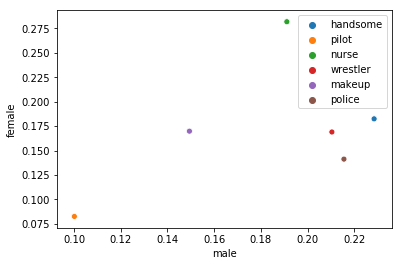

In [398]:
sns.scatterplot(x='male', y='female', data=gender_sim, hue=gender_sim.index)

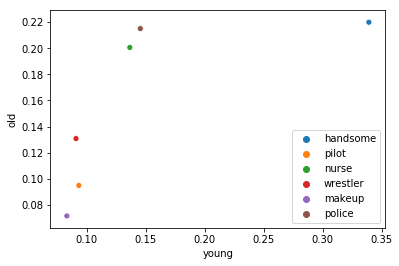

In [399]:
sns.scatterplot(x='young', y='old', data=age_sim, hue=age_sim.index)

#### Interpretation for Q7

##### Part 1:
**male/female**
For part 1 of this exercise, when looking at male and female scales, we can see typical values that would be expected for the terms. Specifically, words that would stereotypically be defined as male, skewed more male, such as: handsome, pilot, wrestler, and police. Words that would stereotypically skew female were identified as being associated with female, such as: nurse and makeup. 

**young/old**
When looking at the old and young scales for these words, we can see that the words more closely associated with young are: handsome and makeup. The words more closely associated with old are: pilot, nurse, wrestler, and police. The values of the words for young and old were not as skewed as they were for male and female. This can also be seen in the plots above.

#### Q7 Part 2

- (7pts.) Pick the top 100 similar words with the word *information*. 
  - Plot these words in a 2-dimensional scale. 
  - Each axis is a bias scale from above (gender and age). 
  - Provide your interpretation

##### Top 100 similar words to the word information

In [401]:
info_word_lst = w2v_mod.similar_by_vector("information", topn=100)
info_word_lst[:8]

[('info', 0.7363682389259338),
 ('informationon', 0.6339334845542908),
 ('Information', 0.6186580657958984),
 ('details', 0.6063088774681091),
 ('data', 0.5368291139602661),
 ('TENFOLD', 0.47093772888183594),
 ('contact', 0.46467727422714233),
 ('Details', 0.45749080181121826)]

In [ ]:
#--Create bias scale--

In [405]:
similar_gender = w2v_mod.most_similar(positive=['man', 'information'], negative=['woman'], topn=100)
similar_gender[:4]

[('info', 0.6500986218452454),
 ('informationon', 0.5155032277107239),
 ('details', 0.4903624653816223),
 ('Information', 0.48483943939208984)]

In [406]:
similar_age = w2v_mod.most_similar(positive=['old', 'information'], negative=['young'], topn=100)
similar_age[:4]

[('info', 0.4799690842628479),
 ('Information', 0.4483199119567871),
 ('informationon', 0.41373300552368164),
 ('data', 0.3790130019187927)]

###### Create plots for 100 similar words with the word information with male and female scale


In [413]:
#--Create dataframe-- 
d = {'gender':similar_gender, 'age':similar_age}
df = pd.DataFrame(data=d)
df.head(5)

,gender,age
0,"(info, 0.6500986218452454)","(info, 0.4799690842628479)"
1,"(informationon, 0.5155032277107239)","(Information, 0.4483199119567871)"
2,"(details, 0.4903624653816223)","(informationon, 0.41373300552368164)"
3,"(Information, 0.48483943939208984)","(data, 0.3790130019187927)"
4,"(data, 0.4199426472187042)","(details, 0.3745519518852234)"


#### Create list of words that only appear in both, create data frame from that, then plot data on 2Dplot

In [437]:
#--Remove this list of words from gender_df
gender_not_in_age = []
for word in gender_word:
    if word not in age_word:
        gender_not_in_age.append(word)
len(gender_not_in_age)

#--Remove this list of words from age_df
age_not_in_g = []
for word in age_word:
    if word not in gender_word:
        age_not_in_g.append(word)

In [442]:
#--Create lists for dataframe--
gender_word = []
for word in similar_gender:
    gender_word.append(word[0].lower())
    
gender_val = []
for val in similar_gender:
    gender_val.append(val[1])
    
age_word = []
for word in similar_age:
    age_word.append(word[0].lower())
    
age_val = []
for val in similar_age:
    age_val.append(val[1])

#--Create data frames--
gender_data = {'word':gender_word, 'gender_val':gender_val}
age_data = {'word': age_word, 'age_val': age_val}

In [443]:
gender_df = pd.DataFrame(data=gender_data)
gender_df.head()

,word,gender_val
0,info,0.650099
1,informationon,0.515503
2,details,0.490362
3,information,0.484839
4,data,0.419943


In [444]:
age_df = pd.DataFrame(data=age_data)
age_df.head()

,word,age_val
0,info,0.479969
1,information,0.448320
2,informationon,0.413733
3,data,0.379013
4,details,0.374552


In [448]:
#--Remove words from each dataframe
# gender_df.merge(age_df)
df = pd.merge(gender_df, age_df, on='word')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


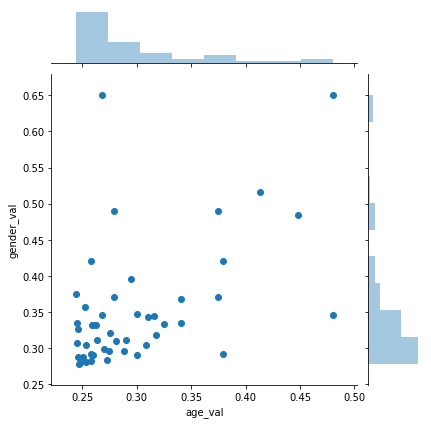

In [449]:
sns.jointplot(x="age_val", y="gender_val", data=df)

#### Interpretation for Q7 Part 2

From the plot for the relationship between gender and age for the word information, the data seems to not have a distinct pattern. It seems that much of the data lies around the bottom left of the visualization, showing that there may not be a great relationship. 

## Q8. (10 pts.) Word clustering
- Pick top-100 similar words with the word *information*.  
- Calculate cosine similarity scores between words
  - e.g., Create a 100x100 matrix that contains cosine similarity scores. Each row and columns should be words. 
- Use seaborn's [```.clustermap()```](https://seaborn.pydata.org/generated/seaborn.clustermap.html) function to draw a hierarchically-clustered heatmap
- Provide your interpretation

In [451]:
#--1. Find the top 100 words in our current model that are similar to information
info_word_lst = w2v_mod.similar_by_vector("information", topn=100)
info_word_lst[:5]

[('info', 0.7363682389259338),
 ('informationon', 0.6339334845542908),
 ('Information', 0.6186580657958984),
 ('details', 0.6063088774681091),
 ('data', 0.5368291139602661)]

In [453]:
#--Create a list of words and a list of word values to use for dataframe--
word_lst = []
word_val = []

for word in info_word_lst:
    word_lst.append(word[0])
    
for val in info_word_lst:
    word_val.append(val[1])

In [460]:
word_vectors = []

for word in word_lst:
    word_vectors.append(w2v_mod[word])

word_vec_df = pd.DataFrame(word_vectors)

In [461]:
from sklearn.metrics.pairwise import cosine_similarity
wvdf = cosine_similarity(word_vec_df)

In [462]:
import seaborn as sns

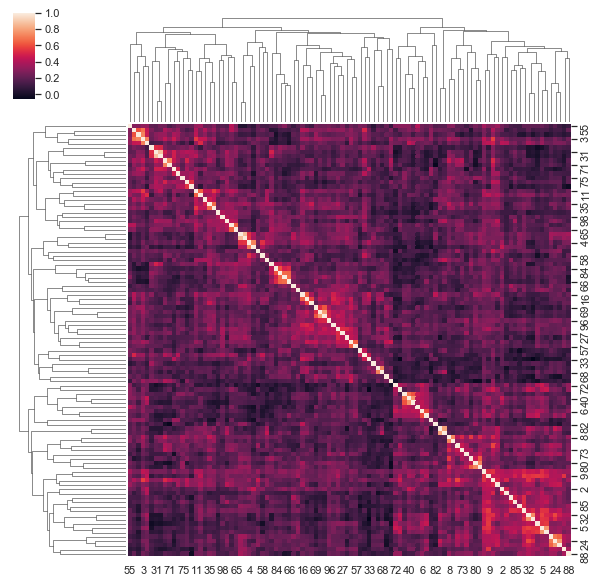

In [463]:
sns.clustermap(wvdf)

#### Interpretation for Q8

From this heatmap, we can see a stronger correlation in the lower right corner of the visualization and that there is also stronger relationships to words on the diagnol axis (not including the actual diagonal axis itself).
